<a href="https://colab.research.google.com/github/vinaykumar2491/Project_MachineLearning/blob/master/imflash217_fastai_2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression Problem
```
The goal of Linear Regression is to fit a line to a set of points
```

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from fastai.basics import *

In [0]:
n = 100         ## Total number of points

In [18]:
x = torch.ones(n,2)
x.shape

torch.Size([100, 2])

In [19]:
x[:,0].uniform_(-1,1)

tensor([-0.6428,  0.4388,  0.2813, -0.3008,  0.5504,  0.4772, -0.0023, -0.7492,
         0.0592, -0.5577,  0.1818,  0.9939, -0.7550, -0.2577, -0.2506,  0.0686,
        -0.0130,  0.6819, -0.1964, -0.4834, -0.2458, -0.5486, -0.6064, -0.1340,
        -0.1152, -0.8216, -0.1665, -0.5561,  0.1536, -0.9789, -0.8055, -0.6742,
         0.5760,  0.9625,  0.3162,  0.8242,  0.6232,  0.3593,  0.6433, -0.0712,
        -0.5289,  0.2161, -0.3457, -0.1358, -0.2623,  0.5235, -0.0667,  0.2988,
        -0.4158, -0.0723,  0.4706, -0.5331,  0.5892, -0.2762,  0.7260, -0.3778,
         0.6631, -0.1378,  0.5863,  0.9071,  0.0225,  0.3561, -0.9969, -0.4057,
        -0.1098, -0.3949,  0.5225,  0.4678, -0.3402,  0.5057, -0.1695,  0.5091,
         0.2292,  0.4148, -0.2138, -0.2962,  0.6267,  0.5271,  0.4487,  0.9934,
        -0.3499, -0.8244,  0.4113,  0.1524,  0.6189,  0.4157, -0.4104,  0.6086,
         0.5461,  0.4758,  0.0740,  0.1236,  0.0974,  0.2280, -0.2635,  0.3059,
        -0.0758,  0.7486,  0.6978, -0.36

In [20]:
x[0:5,:]

tensor([[-0.6428,  1.0000],
        [ 0.4388,  1.0000],
        [ 0.2813,  1.0000],
        [-0.3008,  1.0000],
        [ 0.5504,  1.0000]])

In [31]:
### using a to calculate our ground values
a = tensor(3.,2)
a

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)

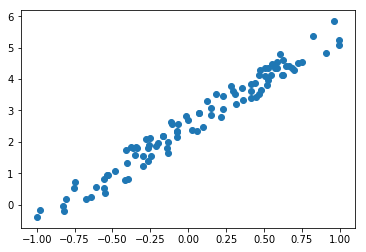

In [29]:
plt.scatter(x[:,0], y)

In [0]:
### Loss function:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

In [32]:
### Suppose a_hat = (-1., 1.)
### Now we use it to calculate our y_hat
### Then use it to calculate mse(y_hat, y) loss

a_hat = tensor(-1., 1.)
y_hat = x@a_hat
loss = mse(y_hat, y)
print(loss)

tensor(7.0040)


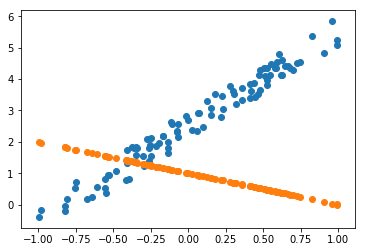

In [33]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

## Gradient Descent

In [34]:
a_hat = torch.nn.Parameter(a_hat)
a_hat

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def sgd_update():
    y_hat = x@a_hat
    loss = mse(y_hat, y)
    if t%10 == 0: print("loss = ", loss)
    loss.backward()
    with torch.no_grad():
        a_hat.sub_(lr*a_hat.grad)
        a_hat.grad.zero_()

In [36]:
lr = 1e-1
for t in range(100):
    sgd_update()

loss =  tensor(7.0040, grad_fn=<MeanBackward0>)
loss =  tensor(1.4350, grad_fn=<MeanBackward0>)
loss =  tensor(0.5683, grad_fn=<MeanBackward0>)
loss =  tensor(0.2601, grad_fn=<MeanBackward0>)
loss =  tensor(0.1459, grad_fn=<MeanBackward0>)
loss =  tensor(0.1034, grad_fn=<MeanBackward0>)
loss =  tensor(0.0877, grad_fn=<MeanBackward0>)
loss =  tensor(0.0818, grad_fn=<MeanBackward0>)
loss =  tensor(0.0797, grad_fn=<MeanBackward0>)
loss =  tensor(0.0789, grad_fn=<MeanBackward0>)


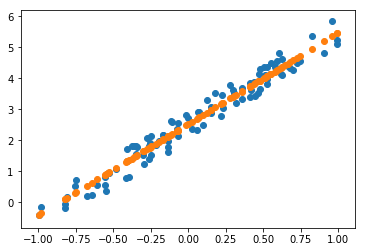

In [39]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a_hat)

### Animate the SGD process

In [0]:
from matplotlib import animation, rc
rc("animation", html="jshtml")

In [42]:
### animation
a_hat = torch.nn.Parameter(tensor(-1., 1.))
fig = plt.figure()
plt.scatter(x[:,0], y, c="orange")
line, = plt.plot(x[:,0], x@a_hat)
plt.close()

def animate_sgd(i):
    sgd_update()
    line.set_ydata(x@a_hat)
    return line

animation.FuncAnimation(fig=fig, func=animate_sgd, frames=np.arange(0,100), interval=20)